# DATA PREPROCESSING

Data preprocessing is a fundamental step in any data analysis or machine learning project. It involves cleaning, transforming, and organizing raw data into a format that is suitable for analysis or model training. This process is essential because real-world data often contains inconsistencies, missing values, and other imperfections that can hinder the performance of machine learning algorithms.

In this scenario, we'll focus on preprocessing an employee dataset to make it suitable for analysis by machine learning algorithms. The employee dataset likely contains various attributes such as company,age, salary, place, country & gender. Before we can apply machine learning algorithms to this dataset, we need to preprocess it to address common issues and ensure that the data is in a format that the algorithms can effectively learn from.

In [46]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn

In [47]:
#loading data
df=pd.read_csv('Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### Data Exploration:

In [48]:
# To get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [49]:
#To display the initial rows
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [50]:
#To display the final rows of the DataFrame
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [51]:
#To display column labels of DataFrame
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [52]:
#To display the statistical analysis for numerical columns within the DataFrame
print("\nStatistical analysis on numerical features:")
df.describe()


Statistical analysis on numerical features:


,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


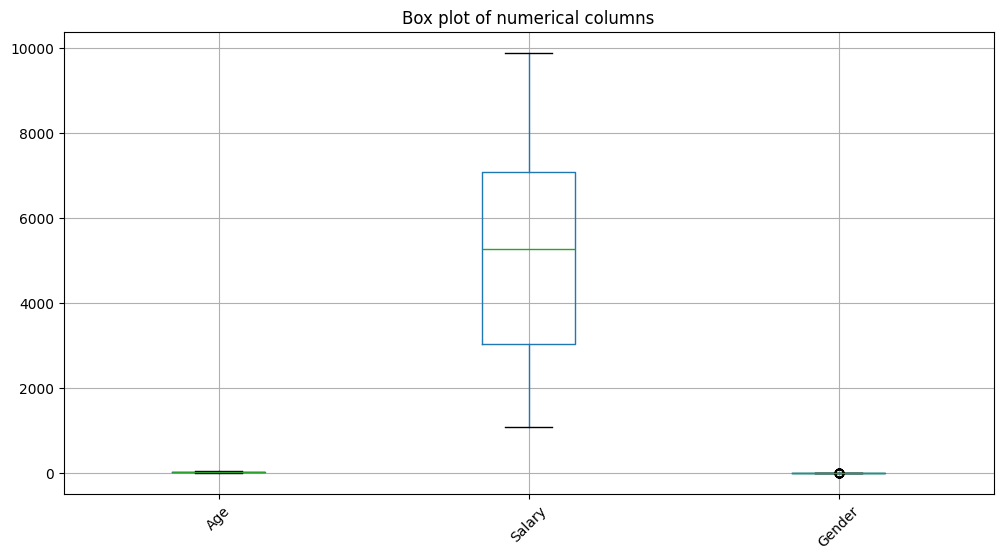

In [90]:
#checking the presence of outliers by plotting .

plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Box plot of numerical columns')
plt.xticks(rotation=45)
plt.show()

From the box plot we can infer that, there is no significant outliers present in this dataframe

In [53]:
#Checking is there any null value
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In employee table, null values are present in all columns except for gender and country.

In [54]:
#renaming column 'place' to 'State'
df.rename(columns={'Place': 'State'}, inplace=True)
df

,Company,Age,Salary,State,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [55]:
#To remove any duplicate records
df=df.drop_duplicates()
df

,Company,Age,Salary,State,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [56]:
df=df.reset_index(drop=True)

In [57]:
#listing down the unique values in each feature and find its length
print("Unqiue Values in each feature  & its Length")
for column in df.columns:
    unique_values=df[column].unique()
    length= len(df[column].unique())
    print(column,":",unique_values,"(Length:",length,")")

Unqiue Values in each feature  & its Length
Company : ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] (Length: 7 )
Age : [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] (Length: 30 )
Salary : [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] (Length: 41 )
State : ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] (Length: 12 )
Country : ['India'] (Length: 1 )
Gender : [0 1] (Length: 2 )


### Data Cleaning: 

In [58]:
#replacing 'Tata Consultancy Services' to 'TCS'
df['Company'] = df['Company'].replace('Tata Consultancy Services', 'TCS')

In [59]:
#replacing 'Infosys Pvt Lmt' to 'TCS'
df['Company'] = df['Company'].replace('Infosys Pvt Lmt', 'Infosys')

In [60]:
df[df['Age']==0]

,Company,Age,Salary,State,Country,Gender
87,Infosys,0.0,3030.0,Calcutta,India,0
91,TCS,0.0,3045.0,Delhi,India,0
100,CTS,0.0,2034.0,Podicherry,India,0
106,TCS,0.0,9024.0,Chennai,India,1
110,Infosys,0.0,3234.0,Mumbai,India,0
120,CTS,0.0,1234.0,Calcutta,India,0


In [61]:
# Replace 0 with NaN in the "Age" column
df['Age'] = df['Age'].replace(0.0, np.NaN)

In [62]:
df['Age'].isnull().sum()

23

There exist 23 null values in age columns. So we need to replace these null values

In [63]:
mean_age=math.ceil(df['Age'].mean())
mean_age

33

In [64]:
median_age=math.ceil(df['Age'].median())
median_age

33

We can infer that there is no significant difference between mean and median, which indicates minimal occurrence of outliers. Hence we can replace the null values by mean

In [65]:
# Replace NaN in the "Age" column with mean value
df['Age'] = df['Age'].replace(np.NaN, mean_age)

In [66]:
unique_age=df['Age'].unique()
unique_age

array([20., 30., 35., 40., 23., 33., 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       17., 54.])

In [67]:
mean_salary=df['Salary'].mean()
mean_salary

5283.471074380165

We can infer that there is no significant difference between mean and median, which indicates minimal occurrence of outliers. Hence we can replace the null values by mean

In [68]:
median_salary=df['Salary'].median()
median_salary

5000.0

In [69]:
# Replace NaN in the "Salary" column with mean value
df['Salary'] = df['Salary'].replace(np.NaN, mean_salary)

Hence gender column is discrete, we can replace the null values by mode of gender

In [70]:
df['Gender'].isnull().sum()

0

Gender column doesn't contain null values

In [71]:
df['State'].isnull().sum()

14

State column contains 14 null values. State column contains discrete values, hence we can replace it by mode of state

In [72]:
mode_state=df['State'].mode()[0]
mode_state

'Mumbai'

In [73]:
# Replace NaN in the "State" column with mode
df['State'] = df['State'].replace(np.NaN, mode_state)

In [74]:
df['Company'].isnull().sum()

8

There exist 8 null values in company columns. Company column contains discrete values, we can replace it by mode

In [75]:
mode_company=df['Company'].mode()[0]
mode_company

'TCS'

In [76]:
# Replace NaN in the "Company" column with mode
df['Company'] = df['Company'].replace(np.NaN, mode_company)

In [77]:
df.isnull().sum()

Company    0
Age        0
Salary     0
State      0
Country    0
Gender     0
dtype: int64

We have replaced all null values by appropriate measures

### Data Analysis

In [78]:
#Filtering the data with age >40 and salary<5000
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_data

,Company,Age,Salary,State,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
85,Infosys,41.0,3000.0,Delhi,India,0
92,Infosys,54.0,3184.0,Mumbai,India,0
103,Infosys,44.0,4034.0,Delhi,India,0


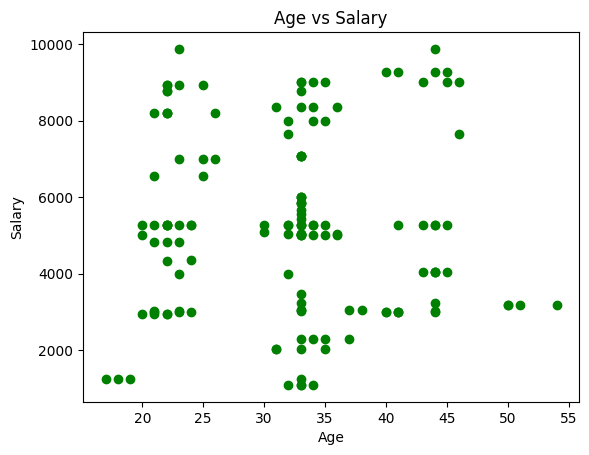

In [79]:
#Plotting the chart with age and salary

#plotting scatter plot
plt.scatter(df['Age'], df['Salary'], color='green')

#Setting the label & title
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')


#show the plot
plt.show()

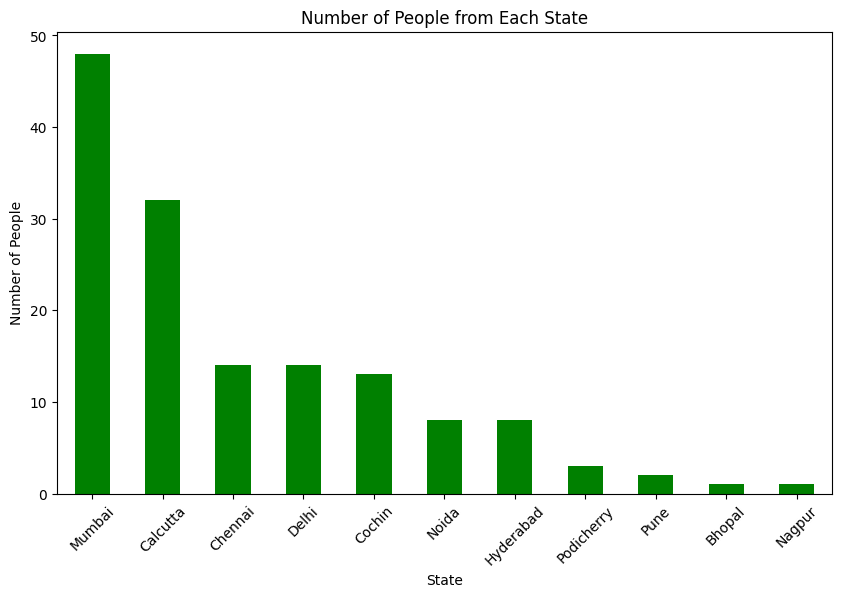

In [80]:
#Counting the number of people from each place and represent it visually

#counting no:of people in each state
state_counts = df['State'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='green')

# Setting the labels and title
plt.xlabel('State')
plt.ylabel('Number of People')
plt.title('Number of People from Each State')

# Showing the plot
plt.xticks(rotation=45)  
plt.show()

### Data Encoding

Converting categorical variables into numerical representations using techniques such as one-hot encoding & label encoding, making them suitable for analysis by machine learning algorithms.

#### 1.One-Hot Encoding

In [81]:
#using get_dummies function

df_one_hot_encoded = pd.get_dummies(data = df, columns = ["Company", "State","Country"])

print(df_one_hot_encoded )

      Age       Salary  Gender  Company_CTS  Company_Congnizant  \
0    20.0  5283.471074       0        False               False   
1    30.0  5283.471074       0        False               False   
2    35.0  2300.000000       0        False               False   
3    40.0  3000.000000       0        False               False   
4    23.0  4000.000000       0        False               False   
..    ...          ...     ...          ...                 ...   
139  22.0  8202.000000       0        False               False   
140  33.0  9024.000000       1        False               False   
141  44.0  4034.000000       1        False               False   
142  33.0  5034.000000       1        False               False   
143  22.0  8202.000000       0        False               False   

     Company_Infosys  Company_TCS  State_Bhopal  State_Calcutta  \
0              False         True         False           False   
1               True        False         False           Fal

Each unique value in Company,state & Country columns have been converted into a new binary column where False represent 0 and True represent 1

In [82]:
#using OneHotEncoder Function

from sklearn.preprocessing import OneHotEncoder


cols_to_encode = ["Company", "State","Country"]
new_encoded_cols = []


# Create a list of new columns names
for col in cols_to_encode:
    new_encoded_cols += [f"is_{category}" for category in df[col].unique().tolist()]

print(new_encoded_cols)
#['is_TCS', 'is_Infosys', 'is_CTS', 'is_Congnizant', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune', 'is_India']


# Inititalize and fit One Hot Encoder class from sklearn
one_hot_encoder = OneHotEncoder(sparse_output = False,handle_unknown = 'ignore')
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])
print(encoded_cols)

# As the output of the above transformer would be a sparse matrix, we need to convert it back to Pandas dataframe
df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols)
print(df_encoded)
df_one_hot_encoded = df.join(df_encoded)

print(df_one_hot_encoded)


['is_TCS', 'is_Infosys', 'is_CTS', 'is_Congnizant', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune', 'is_India']
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]
     is_TCS  is_Infosys  is_CTS  is_Congnizant  is_Chennai  is_Mumbai  \
0       0.0         0.0     0.0            1.0         0.0        0.0   
1       0.0         0.0     1.0            0.0         0.0        0.0   
2       0.0         0.0     0.0            1.0         0.0        1.0   
3       0.0         0.0     1.0            0.0         0.0        0.0   
4       0.0         0.0     0.0            1.0         0.0        0.0   
..      ...         ...     ...            ...         ...        ...   
139     0.0         0.0     1.0            0.0         0.0        0.0   
140     0.0         0.0     0.0            1.0 

In [83]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

cols_to_encode = ["Company", "State", "Country"]

#label_encoder is the object of LabelEncode
label_encoder = LabelEncoder()

# Initialize a new DataFrame to store the encoded columns
df_label_encoded = df.copy()

# Encode each column in cols_to_encode
for col in cols_to_encode:
    df_label_encoded[col] = label_encoder.fit_transform(df[col])

print(df_label_encoded)

     Company   Age       Salary  State  Country  Gender
0          3  20.0  5283.471074      2        0       0
1          2  30.0  5283.471074      6        0       0
2          3  35.0  2300.000000      1        0       0
3          2  40.0  3000.000000      4        0       0
4          3  23.0  4000.000000      6        0       0
..       ...   ...          ...    ...      ...     ...
139        2  22.0  8202.000000      6        0       0
140        3  33.0  9024.000000      1        0       1
141        2  44.0  4034.000000      4        0       1
142        3  33.0  5034.000000      6        0       1
143        2  22.0  8202.000000      3        0       0

[144 rows x 6 columns]


#### Feature Scaling

Feature scaling is a technique used in machine learning and data preprocessing to standardize the range of independent variables or features in the dataset. The goal of feature scaling is to ensure that all features contribute equally to the analysis and modeling process, preventing features with larger scales from dominating those with smaller scales.

#### 1.Standard Scaler

In [84]:
from sklearn.preprocessing import StandardScaler

Columns_to_Scale=df[['Age','Salary']]
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(Columns_to_Scale)

# Transform the data
scaled_data = scaler.transform(Columns_to_Scale)

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Salary'])

# Initialize a new DataFrame to store after applying standard scaler
df_standard = df.copy()

# Replace scaled columns in the original DataFrame
df_standard[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_standard)


     Company       Age    Salary     State Country  Gender
0        TCS -1.484676  0.000000   Chennai   India       0
1    Infosys -0.267174  0.000000    Mumbai   India       0
2        TCS  0.341577 -1.264122  Calcutta   India       0
3    Infosys  0.950328 -0.967526     Delhi   India       0
4        TCS -1.119426 -0.543818    Mumbai   India       0
..       ...       ...       ...       ...     ...     ...
139  Infosys -1.241176  1.236606    Mumbai   India       0
140      TCS  0.098077  1.584894  Calcutta   India       1
141  Infosys  1.437329 -0.529412     Delhi   India       1
142      TCS  0.098077 -0.105703    Mumbai   India       1
143  Infosys -1.241176  1.236606    Cochin   India       0

[144 rows x 6 columns]


In [85]:
#dataframe after label encoding & standard scaling


# Initialize a new DataFrame to store after applying standard scaler
df_standard = df_label_encoded.copy()

# Replace scaled columns in the original DataFrame
df_standard[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_standard)


     Company       Age    Salary  State  Country  Gender
0          3 -1.484676  0.000000      2        0       0
1          2 -0.267174  0.000000      6        0       0
2          3  0.341577 -1.264122      1        0       0
3          2  0.950328 -0.967526      4        0       0
4          3 -1.119426 -0.543818      6        0       0
..       ...       ...       ...    ...      ...     ...
139        2 -1.241176  1.236606      6        0       0
140        3  0.098077  1.584894      1        0       1
141        2  1.437329 -0.529412      4        0       1
142        3  0.098077 -0.105703      6        0       1
143        2 -1.241176  1.236606      3        0       0

[144 rows x 6 columns]


In [86]:
#dataframe after OneHotEncoding & standard scaling

# Initialize a new DataFrame to store after applying standard scaler
df_standard = df_one_hot_encoded.copy()

# Replace scaled columns in the original DataFrame
df_standard[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_standard)

     Company       Age    Salary     State Country  Gender  is_TCS  \
0        TCS -1.484676  0.000000   Chennai   India       0     0.0   
1    Infosys -0.267174  0.000000    Mumbai   India       0     0.0   
2        TCS  0.341577 -1.264122  Calcutta   India       0     0.0   
3    Infosys  0.950328 -0.967526     Delhi   India       0     0.0   
4        TCS -1.119426 -0.543818    Mumbai   India       0     0.0   
..       ...       ...       ...       ...     ...     ...     ...   
139  Infosys -1.241176  1.236606    Mumbai   India       0     0.0   
140      TCS  0.098077  1.584894  Calcutta   India       1     0.0   
141  Infosys  1.437329 -0.529412     Delhi   India       1     0.0   
142      TCS  0.098077 -0.105703    Mumbai   India       1     0.0   
143  Infosys -1.241176  1.236606    Cochin   India       0     0.0   

     is_Infosys  is_CTS  is_Congnizant  ...  is_Calcutta  is_Delhi  \
0           0.0     0.0            1.0  ...          1.0       0.0   
1           0.0    

#### 2.MinMaxScaler

In [87]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Columns_to_Scale=df[['Age','Salary']]

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(Columns_to_Scale)

# Transform the data
scaled_data = scaler.transform(Columns_to_Scale)

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Salary'])

# Initialize a new DataFrame to store after applying standard scaler
df_minmax = df.copy()

# Replace scaled columns in the original DataFrame
df_minmax[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_minmax)



     Company       Age    Salary     State Country  Gender
0        TCS  0.081081  0.477350   Chennai   India       0
1    Infosys  0.351351  0.477350    Mumbai   India       0
2        TCS  0.486486  0.137817  Calcutta   India       0
3    Infosys  0.621622  0.217480     Delhi   India       0
4        TCS  0.162162  0.331285    Mumbai   India       0
..       ...       ...       ...       ...     ...     ...
139  Infosys  0.135135  0.809491    Mumbai   India       0
140      TCS  0.432432  0.903039  Calcutta   India       1
141  Infosys  0.729730  0.335154     Delhi   India       1
142      TCS  0.432432  0.448959    Mumbai   India       1
143  Infosys  0.135135  0.809491    Cochin   India       0

[144 rows x 6 columns]


In [88]:
#dataframe after label encoding & minmax scaling

# Initialize a new DataFrame to store after applying standard scaler
df_minmax = df_label_encoded.copy()

# Replace scaled columns in the original DataFrame
df_minmax[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_minmax)

     Company       Age    Salary  State  Country  Gender
0          3  0.081081  0.477350      2        0       0
1          2  0.351351  0.477350      6        0       0
2          3  0.486486  0.137817      1        0       0
3          2  0.621622  0.217480      4        0       0
4          3  0.162162  0.331285      6        0       0
..       ...       ...       ...    ...      ...     ...
139        2  0.135135  0.809491      6        0       0
140        3  0.432432  0.903039      1        0       1
141        2  0.729730  0.335154      4        0       1
142        3  0.432432  0.448959      6        0       1
143        2  0.135135  0.809491      3        0       0

[144 rows x 6 columns]


In [89]:
#dataframe after OneHotEncoding & minmax scaling

# Initialize a new DataFrame to store after applying standard scaler
df_minmax = df_one_hot_encoded.copy()

# Replace scaled columns in the original DataFrame
df_minmax[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_minmax)

     Company       Age    Salary     State Country  Gender  is_TCS  \
0        TCS  0.081081  0.477350   Chennai   India       0     0.0   
1    Infosys  0.351351  0.477350    Mumbai   India       0     0.0   
2        TCS  0.486486  0.137817  Calcutta   India       0     0.0   
3    Infosys  0.621622  0.217480     Delhi   India       0     0.0   
4        TCS  0.162162  0.331285    Mumbai   India       0     0.0   
..       ...       ...       ...       ...     ...     ...     ...   
139  Infosys  0.135135  0.809491    Mumbai   India       0     0.0   
140      TCS  0.432432  0.903039  Calcutta   India       1     0.0   
141  Infosys  0.729730  0.335154     Delhi   India       1     0.0   
142      TCS  0.432432  0.448959    Mumbai   India       1     0.0   
143  Infosys  0.135135  0.809491    Cochin   India       0     0.0   

     is_Infosys  is_CTS  is_Congnizant  ...  is_Calcutta  is_Delhi  \
0           0.0     0.0            1.0  ...          1.0       0.0   
1           0.0    